In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import re
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import warnings
warnings.simplefilter('ignore')

# Dataset 1: Nutrition

## Introduction

This Dataset is wide with 25 variables and 5591 observations. There are 5 different (Breastfeeding, Sugary Drinks, Physical Activity, Fruits and Vegetables and Televison watching), 5 topics and 27 different questions. Each question should have their own column based on the class they belong to since some values are listed as percentages, averages and “number of”. A table is created for each class. Only 2 tables will be focused on in this dataset for this project. For more information, visit [HeathData.gov](https://healthdata.gov/dataset/nutrition-physical-activity-and-obesity-policy-and-environmental-data).

### Full Data

In [125]:
nutrition = pd.read_csv("https://raw.githubusercontent.com/javernw/JWCUNYAssignments/master/Nutrition__Physical_Activity__and_Obesity_-_Policy_and_Environmental_Data.csv")
nutrition.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2018,2018,AL,Alabama,Breastfeeding Surveillance Sources,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",BF,BF2,Q016,VALUE,1,Total,Total,OVR,OVERALL
1,2018,2018,AK,Alaska,Breastfeeding Surveillance Sources,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,NaN,Value,...,"(64.84507995700051, -147.72205903599973)",BF,BF2,Q016,VALUE,2,Total,Total,OVR,OVERALL
2,2018,2018,AZ,Arizona,Breastfeeding Surveillance Sources,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,NaN,Value,...,"(34.865970280000454, -111.76381127699972)",BF,BF2,Q016,VALUE,4,Total,Total,OVR,OVERALL
3,2018,2018,AR,Arkansas,Breastfeeding Surveillance Sources,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,NaN,Value,...,"(34.74865012400045, -92.27449074299966)",BF,BF2,Q016,VALUE,5,Total,Total,OVR,OVERALL
4,2018,2018,CA,California,Breastfeeding Surveillance Sources,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,NaN,Value,...,"(37.63864012300047, -120.99999953799971)",BF,BF2,Q016,VALUE,6,Total,Total,OVR,OVERALL


### Subset

In [126]:
nutrition_sub = nutrition[['YearStart', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Question', 'Data_Value',  'GeoLocation']]
nutrition_sub.head(10)

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value,GeoLocation
0,2018,2018,Alabama,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,16.5,"(32.84057112200048, -86.63186076199969)"
1,2018,2018,Alaska,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,3.4,"(64.84507995700051, -147.72205903599973)"
2,2018,2018,Arizona,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,6.8,"(34.865970280000454, -111.76381127699972)"
3,2018,2018,Arkansas,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,21.7,"(34.74865012400045, -92.27449074299966)"
4,2018,2018,California,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,44.8,"(37.63864012300047, -120.99999953799971)"
5,2018,2018,Colorado,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,48.9,"(38.843840757000464, -106.13361092099967)"
6,2018,2018,Connecticut,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,46.3,"(41.56266102000046, -72.64984095199964)"
7,2018,2018,Delaware,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,88.1,"(39.008830667000495, -75.57774116799965)"
8,2018,2018,District of Columbia,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,49,"(38.89037138500049, -77.03196112699965)"
9,2018,2018,Florida,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...,17.5,"(28.932040377000476, -81.92896053899966)"


### Areas Covered

Table showing the different topics discussed in the dataset

In [127]:
topics = nutrition_sub[['Class', 'Topic', 'Question']].drop_duplicates()
topics.head()

,Class,Topic,Question
0,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Percent of live births occurring at facilities...
55,Sugar Drinks,Sugar Drinks - Environmental or Policy Supports,Percent of secondary schools that allowed stud...
105,Sugar Drinks,Sugar Drinks - Environmental or Policy Supports,Percent of secondary schools that allowed stud...
155,Breastfeeding,Breastfeeding - Environmental or Policy Supports,Average Maternity Practice in Infant Nutrition...
416,Breastfeeding,Breastfeeding - Environmental or Policy Supports,"Number of La Leche League leaders per 1,000 li..."


### Breast Feeding

Please note no data were collected for the Le Leche League until 2011.

In [128]:
breastfeeding = nutrition_sub[nutrition_sub['Class'] == 'Breastfeeding']
breastfeeding.drop(['Class', 'Topic', 'GeoLocation'], axis = 1, inplace = True)
breastfeeding.head(10)


,YearStart,YearEnd,LocationDesc,Question,Data_Value
0,2018,2018,Alabama,Percent of live births occurring at facilities...,16.5
1,2018,2018,Alaska,Percent of live births occurring at facilities...,3.4
2,2018,2018,Arizona,Percent of live births occurring at facilities...,6.8
3,2018,2018,Arkansas,Percent of live births occurring at facilities...,21.7
4,2018,2018,California,Percent of live births occurring at facilities...,44.8
5,2018,2018,Colorado,Percent of live births occurring at facilities...,48.9
6,2018,2018,Connecticut,Percent of live births occurring at facilities...,46.3
7,2018,2018,Delaware,Percent of live births occurring at facilities...,88.1
8,2018,2018,District of Columbia,Percent of live births occurring at facilities...,49
9,2018,2018,Florida,Percent of live births occurring at facilities...,17.5


In [129]:
breastfeeding['Data_Value'] = breastfeeding['Data_Value'].apply(pd.to_numeric) 
breastfeeding = breastfeeding.pivot_table(index = ['YearEnd', 'LocationDesc'], columns = 'Question', values = 'Data_Value')
breastfeeding.rename(columns ={"Average Maternity Practice in Infant Nutrition and Care (mPINC) score among hospitals and birthing facilities":"Avg Maternity Practice Score","Number of International Board Certified Lactation Consultants (IBCLCs) per 1,000 live births":"Certified Lactation Consultants per 1000 births","Number of La Leche League leaders per 1,000 live births":"La Leche League Leaders per 1000 births", "Percent of live births occurring at facilities designated as \"baby friendly\" by the Baby Friendly Hospital Initiative (BFHI)":"Percent of births at Baby Friendly Facilities"}, inplace=True)
breastfeeding.reset_index(inplace=True)
breastfeeding.columns.name = ''
breastfeeding.head(10)

,YearEnd,LocationDesc,Avg Maternity Practice Score,Certified Lactation Consultants per 1000 births,La Leche League Leaders per 1000 births,Percent of births at Baby Friendly Facilities
0,2007,Alabama,55.0,1.9,NaN,0.0
1,2007,Alaska,73.0,5.8,NaN,0.0
2,2007,Arizona,62.0,1.3,NaN,0.0
3,2007,Arkansas,48.0,1.7,NaN,0.0
4,2007,California,69.0,1.7,NaN,3.3
5,2007,Colorado,66.0,2.0,NaN,2.1
6,2007,Connecticut,70.0,3.8,NaN,12.4
7,2007,Delaware,63.0,2.9,NaN,0.0
8,2007,District of Columbia,76.0,1.1,NaN,0.0
9,2007,Florida,68.0,1.6,NaN,1.8


#### Live Birth at Baby Friendly Facilities Summary (%)

In [130]:
bff = breastfeeding['Percent of births at Baby Friendly Facilities']
bff.describe()

count    629.000000
mean       9.576312
std       13.625914
min        0.000000
25%        0.000000
50%        5.500000
75%       13.000000
max       99.800000
Name: Percent of births at Baby Friendly Facilities, dtype: float64

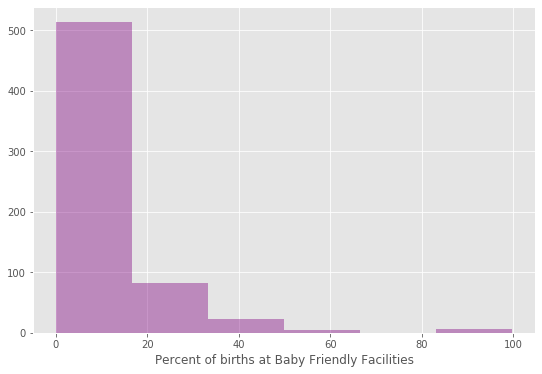

In [131]:
plt.figure(figsize=(9, 6))
sns.distplot(bff, kde=False, bins = 6, color = 'purple')

Here the distribution is skewed to the right. The peak of the histogram hits where as stated in the summary above at an average of 9%. Not every child will be born at a “baby-friendly” facility. Usually when someone is about to give birth (unplanned), they’re taken to the nearest hospital/clinic unless the birth is as expected. Also, there is a possibility of the state or city being small and there is one or two clinics around. In this case, the percentage will be higher of having babies born at one of those “baby-friendly” facilities.

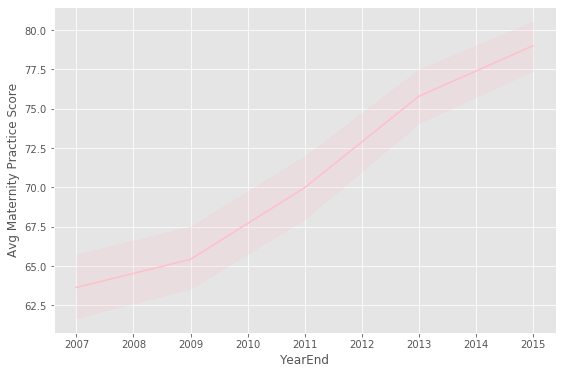

In [132]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=breastfeeding, x='YearEnd',y='Avg Maternity Practice Score', color = 'pink')

This line graph shows averages among baby facilities over a 10 year span. It displays how much attention was drawn to the awareness of Practice in Infant nutrition and care. As the years increase more peope are becoming more involved and educated about this practce. As we can see, by the end of 2007-2008 most average scores ranged up to about 82 but after 2010 onto 2017 we see the scores increased atleast 17%.

### Sugar Drinks

In [133]:
sugar_drinks = nutrition_sub[nutrition_sub['Class'] == 'Sugar Drinks']
sugar_drinks.drop(['Class', 'Topic'], axis = 1, inplace = True)
sugar_drinks.head(10)

soft_drinks = sugar_drinks.set_index(["YearEnd", "LocationDesc"]).pivot(columns="Question")['Data_Value'].reset_index().rename_axis(None, axis=1)

# reshape dataframe from long to wide
sugar_drinks = sugar_drinks.set_index(["YearEnd", "LocationDesc", "GeoLocation"])\
.pivot(columns="Question")['Data_Value']\
.reset_index()\
.rename_axis(None, axis=1)

#rename columns
sugar_drinks = sugar_drinks.rename(columns={"YearEnd":"Year",\
"Percent of secondary schools that allowed students to purchase soda pop or fruit drinks from one or more vending machines or at the school store, canteen, or snack bar":"Percent of secondary school that allow Soda or Fruit Drinks",\
"Percent of secondary schools that allowed students to purchase sports drinks from one or more vending machines or at the school store, canteen, or snack bar":"Percent of secondary school that allow Sport Drinks",\
"State child care regulations align with national standards for avoiding sugar, including concentrated sweets such as candy, sodas, sweetened drinks, fruit nectars, and flavored milk":"Avoid Sugar?"})


# split the GeoLocation column into two to get Latitude and Longitude columns
lat_long = sugar_drinks["GeoLocation"].str.split(",", n = 1, expand = True) 

# perform regex to extract coordinates
# Latitude
lat = str(list(lat_long[0]))
lat = re.sub("[(]", "", lat)
lat = re.findall("(\d+\.\d+| nan)", lat)

#Longitude
long = str(list(lat_long[1]))
long = re.sub("[)]", "", long)
long = re.findall(".(\d+\.\d+| nan)", long)

# Add new columns and remove GeoLocation
sugar_drinks["Latitude"] = lat
sugar_drinks["Longitude"] = long
sugar_drinks.drop(columns = ["GeoLocation"], inplace=True)

# display data
sugar_drinks.head(15)

,Year,LocationDesc,Percent of secondary school that allow Soda or Fruit Drinks,Percent of secondary school that allow Sport Drinks,Avoid Sugar?,Latitude,Longitude
0,2010,Alabama,21.1,38.8,No,32.84057112200048,86.63186076199969
1,2010,Alaska,25.9,38,No,64.84507995700051,147.72205903599973
2,2010,Arizona,22.8,35.3,No,34.865970280000454,111.76381127699972
3,2010,Arkansas,30.4,39.6,No,34.74865012400045,92.27449074299966
4,2010,California,11,51.9,No,37.63864012300047,120.99999953799971
5,2010,Colorado,23.4,50.7,No,38.843840757000464,106.13361092099967
6,2010,Connecticut,3.1,8.4,No,41.56266102000046,72.64984095199964
7,2010,Delaware,14.1,34.4,No,39.008830667000495,75.57774116799965
8,2010,District of Columbia,NaN,NaN,No,38.89037138500049,77.03196112699965
9,2010,Florida,37.4,58.5,No,28.932040377000476,81.92896053899966


#### Which State’s secondary schools prevent students from buying soda, fruit or sport drinks from venging machines?

In [132]:
## Insert Map here

#### Soda Summary

In [134]:
sugar_drinks["Percent of secondary school that allow Soda or Fruit Drinks"] = sugar_drinks["Percent of secondary school that allow Soda or Fruit Drinks"].apply(pd.to_numeric)
sugar_drinks["Percent of secondary school that allow Soda or Fruit Drinks"].describe()

count    195.000000
mean      24.351795
std       13.330831
min        0.000000
25%       14.800000
50%       22.400000
75%       34.350000
max       56.100000
Name: Percent of secondary school that allow Soda or Fruit Drinks, dtype: float64

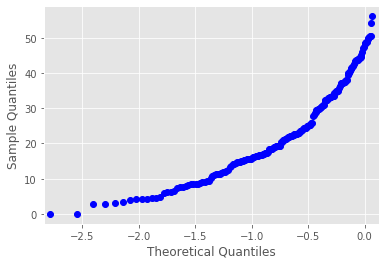

In [135]:
soda = sugar_drinks['Percent of secondary school that allow Soda or Fruit Drinks']
sm.qqplot(soda);

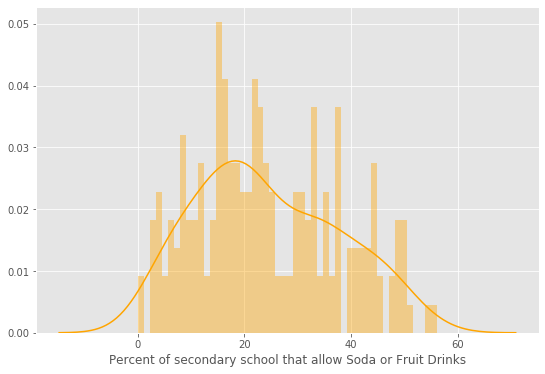

In [138]:
plt.style.use('ggplot')
plt.figure(figsize=(9,6))
sns.distplot(soda, kde=True, bins = 50 , color = 'orange')

#### Sports Summary

In [139]:
sugar_drinks["Percent of secondary school that allow Sport Drinks"] = sugar_drinks["Percent of secondary school that allow Sport Drinks"].apply(pd.to_numeric)
sugar_drinks["Percent of secondary school that allow Sport Drinks"].describe()

count    195.000000
mean      43.607179
std       16.175005
min        6.700000
25%       34.650000
50%       43.200000
75%       56.550000
max       73.800000
Name: Percent of secondary school that allow Sport Drinks, dtype: float64

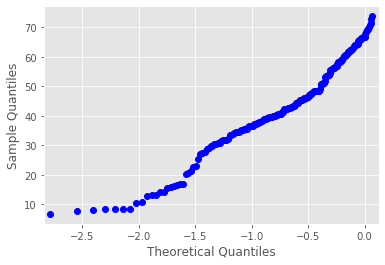

In [140]:
sports = sugar_drinks["Percent of secondary school that allow Sport Drinks"]
sm.qqplot(sports);

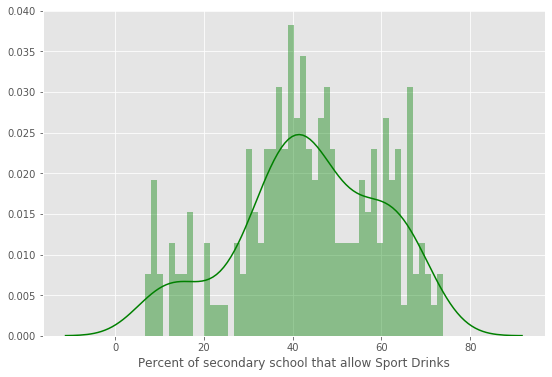

In [142]:
plt.figure(figsize=(9,6))
sns.distplot(sports, kde=True, bins = 50, color = 'green')

Accoring to the graphs above, it seems as though more schools allowed kids to drink sports drinks rather than soda or fruit drinks. Graph A is slightly skewed to the right. They both do not show any extreme deviations so they can both come from a normal model. For soda and sugar drinks, the highest counts range between 10% and 25% while sports drinks populate most between 35% and 55%. This is proven via the summary above mentioning the mean and median for this data.

A lot of times fruit or soda drinks have a empty calories and tons of sugar which make kids hyper then they become lethargic. On the other hand, sport drinks are viewed to replenish energy and keeping kids active. Many sport drinks are endorsed by athletes who kids look up to and wishes to emulate. Schools encourage physical fitness among kids hence why majority of them would allow more sport drinks than soda/fruit drinks.

### Conclusion
The awareness of educating moms the importance of breast feeding is rising. Secondary schools in every state will continue to allow students to buy drinks other than water from the schools. We can all agree that kids are active with or without sugar.

## Dataset 2: Google Play Store

### Introduction

This dataset was chosen to have an idea of how the apps are used with the Google Play Store. We will discover which types of apps are downloaded the most and which ones are people likely to pay for. We also get a view of how reviews or ratings affect what people download. Find dataset at Kaggle.com for further details.

#### Here is a view of the dataset.

In [143]:
gplaystore = pd.read_csv("https://raw.githubusercontent.com/javernw/JWCUNYAssignments/master/googleplaystore.csv", sep = ',')
gplaystore.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Subset but cleaned data...

In [144]:
gplaystore_sub = gplaystore[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']]
gplaystore_sub.head(100)
gplaystore_sub.drop(gplaystore_sub.index[10472], inplace=True)
gplaystore_sub['Reviews'] = gplaystore_sub['Reviews'].apply(pd.to_numeric)

#tidy size column
gplaystore_sub['Size']=gplaystore_sub['Size'].replace("Varies with device", 0)
size = str(list(gplaystore_sub['Size']))
size = re.findall("(\d+\.?\d+|\d)", size)
size = [float(i) for i in size] 
gplaystore_sub['Size'] = size

#tidy installs column
installs = str(list(gplaystore_sub['Installs']))
installs = re.sub("[+,]", "", installs)
installs = re.findall("\d+", installs)
installs = [int(i) for i in installs] 
gplaystore_sub['Installs'] = installs

#tidy price column
price = str(list(gplaystore_sub['Price']))
price = re.sub("\$", "", price)
price = re.findall("(\d+\.\d+|\d)", price)
price = [float(i) for i in price] 
gplaystore_sub['Price'] = price

#display data
gplaystore_sub

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone
5,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone
6,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone
7,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone
8,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone
9,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone


#### Downloads

In [145]:
fig = px.bar(gplaystore_sub, x = 'Category', y='Installs', color = 'Category')
fig.update_layout(showlegend=False)
fig.show()

Games are the most downloaded types of apps with Communication second. It seems as though apps that are usually paid for has the least set of downloads which is understandable. Sometimes, most downloaded apps does not mean that people like them but just wanted to pursue a trial first then maybe delete them.

#### Content Ratings

In [146]:
Content = pd.DataFrame(gplaystore_sub['Content Rating'].value_counts())
Content.reset_index(inplace=True)
Content.columns = ['Grade', 'Count']
Content['Relative_Frequency'] = Content['Count']/len(gplaystore_sub)
Content['Cummulative_Frequency'] = Content['Relative_Frequency'].cumsum()
Content

,Grade,Count,Relative_Frequency,Cummulative_Frequency
0,Everyone,8714,0.803875,0.803875
1,Teen,1208,0.111439,0.915314
2,Mature 17+,499,0.046033,0.961347
3,Everyone 10+,414,0.038192,0.999539
4,Adults only 18+,3,0.000277,0.999815
5,Unrated,2,0.000185,1.000000


80% of the apps are made for Everyone to use.

#### Most Expensive

Assuming $50 and up is considered expensive then most expensive apps belong in Medical and Lifestyle. People are willing to pay for apps that will benefit them in the long run.

In [147]:
gplaystore_sub[gplaystore_sub['Price'] >= 50]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
2253,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone
2365,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone
2390,MEDICAL,NaN,10,28.0,1000,Paid,74.99,Everyone
4197,FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone
4362,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone
4367,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone
5351,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone
5354,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone
5355,LIFESTYLE,3.8,411,2.6,10000,Paid,299.99,Everyone
5356,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone


#### Free VS. Paid

In [148]:
gplaystore_sub['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

According to the dataset, 10000+ apps are free which is equvialient to approximately 93% of the apps in Google Play Store. Free apps are more popular among the users and hence they get the most reviews.

In [149]:
free_paid = gplaystore_sub[gplaystore_sub['Type'].notnull()]
fig = px.box(free_paid, x="Type", y = 'Installs', color = 'Type')
fig.show()

#### Average Ratings

In [150]:
fig = px.histogram(gplaystore_sub, x="Rating")
fig.show()

There are more downloads with free apps than paid ones. This makes sense because people would rather try out the app first before purchasing the professional version if there is such. Another reason is that developers make more money this way. They create the apps in a way that there are in-app purchases especially in games. It’s a win-win- situation.

#### Relationship between Installs and Reviews

In [151]:
fig = px.scatter(gplaystore_sub, x = 'Reviews', y='Installs')
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()

#### Relationship between Installs and Reviews

In [152]:
fig = px.scatter(gplaystore_sub, x = 'Rating', y='Installs')
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()

There is a strong positive correlation between Installs and Reviews. This shows that people down load apps based on the reviews more than they do over the ratings. There are some outliers present in both plots especially in the relationship between Installs and Rating.

### Conclusion

What can be concluded from the reports above in the Google Play Store is that, people generally like to know how a product is doing before they invest time into it. Medical anf Finance apps are the apps people would most likely pay for. On the other hand Gaming and Communication are the top categories people download apps and are free for the public.

## Dataset 3: Superbowl

In [153]:
url = 'http://www.espn.com/nfl/superbowl/history/mvps'
mvp_page = requests.get(url)

#read all tables on page
mvp = pd.read_html(url) 

#get the first one if there are more than one
mvp = pd.DataFrame(mvp[0])
mvp.drop(mvp.index[[0, 1]], inplace = True)
mvp.columns = ['NO.', 'PLAYER', 'HIGHLIGHTS']

#display table
mvp


,NO.,PLAYER,HIGHLIGHTS
2,I,"Bart Starr, QB, Green Bay",Two touchdown passes
3,II,"Bart Starr, QB, Green Bay","202 yards passing, 1 TD"
4,III,"Joe Namath, QB, New York Jets",206 yards passing
5,IV,"Len Dawson, QB, Kansas City","142 yards passing, 1 TD"
6,V,"Chuck Howley, LB, Dallas","Two interceptions, fumble recovery"
7,VI,"Roger Staubach, QB, Dallas","119 yards passing, 2 TDs"
8,VII,"Jake Scott, S, Miami",Two interceptions
9,VIII,"Larry Csonka, FB, Miami","33 carries, 145 yards rushing, 2 TDs"
10,IX,"Franco Harris, RB, Pittsburgh","158 yards rushing, 1 TD"
11,X,"Lynn Swann, WR, Pittsburgh","4 catches, 161 yards, 1 TD"


#### Tidy Table

In [154]:
#Separate PLAYER column
split1 = mvp["PLAYER"].str.split(",", n = 1, expand = True)
mvp['PLAYER'] = split1[0]
split2 =  split1[1].str.split(",", n = 1, expand = True) 
split2
mvp['POSITION'] = split2[0]
mvp['TEAM'] = split2[1]
mvp = mvp[['NO.', 'PLAYER', 'POSITION', 'TEAM', 'HIGHLIGHTS']]

#display tidy table
mvp

,NO.,PLAYER,POSITION,TEAM,HIGHLIGHTS
2,I,Bart Starr,QB,Green Bay,Two touchdown passes
3,II,Bart Starr,QB,Green Bay,"202 yards passing, 1 TD"
4,III,Joe Namath,QB,New York Jets,206 yards passing
5,IV,Len Dawson,QB,Kansas City,"142 yards passing, 1 TD"
6,V,Chuck Howley,LB,Dallas,"Two interceptions, fumble recovery"
7,VI,Roger Staubach,QB,Dallas,"119 yards passing, 2 TDs"
8,VII,Jake Scott,S,Miami,Two interceptions
9,VIII,Larry Csonka,FB,Miami,"33 carries, 145 yards rushing, 2 TDs"
10,IX,Franco Harris,RB,Pittsburgh,"158 yards rushing, 1 TD"
11,X,Lynn Swann,WR,Pittsburgh,"4 catches, 161 yards, 1 TD"


In [155]:
top = pd.DataFrame(mvp['PLAYER'].value_counts())
top.reset_index(inplace = True)
top.columns=['Player', 'Wins']
top_wins = mvp['NO.'][mvp.PLAYER == top['Player'][0]].to_list()
print("The top player is %s with %d wins! He won the following Superbowls >>> %s \n" % (top['Player'][0], top['Wins'][0], top_wins))

The top player is Tom Brady with 4 wins! He won the following Superbowls >>> ['XXXVI', 'XXXVIII', 'XLIX', 'LI'] 



#### Positions Winners Played

In [157]:
pos = mvp['POSITION'].unique()
pos = list(pos)
pos_names =["Quaterback", "Line Backer", "Safety", "Fullback", "Running Back", "Wide Receiver", "Defense Line", "Defensive End", "Cornerback", "Kick Returner"]
winning_pos = pd.DataFrame(list(zip(pos, pos_names)), columns = ['Position', 'Position_name'])
winning_pos

,Position,Position_name
0,QB,Quaterback
1,LB,Line Backer
2,S,Safety
3,FB,Fullback
4,RB,Running Back
5,WR,Wide Receiver
6,DL,Defense Line
7,DE,Defensive End
8,CB,Cornerback
9,KR,Kick Returner


#### Which position is best?

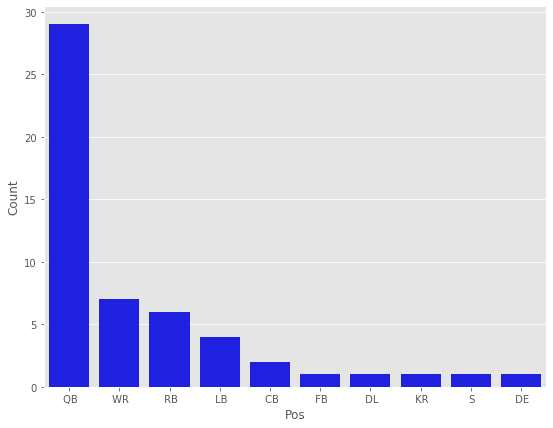

In [158]:
plt.style.use('ggplot')
plt.figure(figsize=(9, 7))
win_pos = pd.DataFrame(mvp['POSITION'].value_counts())
win_pos.reset_index(inplace = True)
win_pos.columns = ['Pos', 'Count']
sns.barplot(x = 'Pos', y = 'Count', color = 'blue', data = win_pos)

Proof that Quaterback player is the best on the teams in football.

#### Popular Team?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

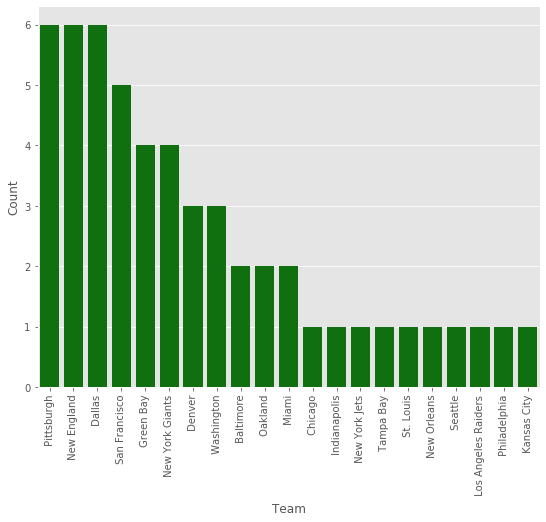

In [159]:
win_team = pd.DataFrame(mvp['TEAM'].value_counts())
win_team.reset_index(inplace = True)
win_team.columns = ['Team', 'Count']

plt.style.use('ggplot')
plt.figure(figsize=(9, 7))
sns.barplot(x = 'Team', y = 'Count', color = 'green', data = win_team)
plt.xticks(rotation=90)

Looks like Dallas, New England and Pittsburgh tied for the top.